In [2]:
import imp
import pandas as pd
import os
import glob

importfiles = os.path.join("./Batch3","matches*.csv")

importfiles = glob.glob(importfiles)

data = pd.concat(map(pd.read_csv,importfiles),ignore_index= True)

print(data)

C:\Users\Mouette\AppData\Local\Temp\ipykernel_12640\1636916417.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


        Unnamed: 0  Match ID              Match Date         Player ID  Rank  \
0                0  79200100  15th Sep 2022 18:32:40  7656119882180390   7.0   
1                1  79200100  15th Sep 2022 18:32:40  7656119816589860   7.0   
2                2  79200100  15th Sep 2022 18:32:40  7656119833621343   9.0   
3                3  79200100  15th Sep 2022 18:32:40  7656119912434321   9.0   
4                4  79200100  15th Sep 2022 18:32:40  7656119911440158  10.0   
...            ...       ...                     ...               ...   ...   
327895           5  79296501  17th Sep 2022 12:23:44  7656119810536684  13.0   
327896           6  79296501  17th Sep 2022 12:23:44  7656119816015274  11.0   
327897           7  79296501  17th Sep 2022 12:23:44  7656119815443985  13.0   
327898           8  79296501  17th Sep 2022 12:23:44  7656119814564744  11.0   
327899           9  79296501  17th Sep 2022 12:23:44  7656119828817932  13.0   

        Rank Gain Team  Team 1 Score  T

In [3]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [4]:
import matplotlib
import datetime

from numpy import mat

def roundTime(dt=None, roundTo=60):
   """Round a datetime object to any time lapse in seconds
   dt : datetime.datetime object, default now.
   roundTo : Closest number of seconds to round to, default 1 minute.
   Author: Thierry Husson 2012 - Use it as you want but don't blame me.
   """
   if dt == None : dt = datetime.datetime.now()
   seconds = (dt.replace(tzinfo=None) - dt.min).seconds
   rounding = (seconds+roundTo/2) // roundTo * roundTo
   return dt + datetime.timedelta(0,rounding-seconds,-dt.microsecond)

In [5]:

match = pd.DataFrame
matchdates = data.get(["Match ID","Match Date"])
# matchdates["Match Date"] = matplotlib.dates.datestr2num(matchdates["Match Date"])
matchdates.drop_duplicates(subset="Match ID",inplace= True)
matchdates["Match Date"] = pd.to_datetime(matchdates["Match Date"])
print(matchdates)

C:\Users\Mouette\AppData\Local\Temp\ipykernel_12640\35693158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchdates.drop_duplicates(subset="Match ID",inplace= True)


        Match ID          Match Date
0       79200100 2022-09-15 18:32:40
10      79200097 2022-09-16 12:53:36
20      79200096 2022-09-15 17:35:36
30      79200093 2022-09-15 17:02:40
40      79200091 2022-09-16 07:14:32
...          ...                 ...
327850  79296505 2022-09-16 23:11:12
327860  79296504 2022-09-17 13:08:16
327870  79296503 2022-09-17 11:39:20
327880  79296502 2022-09-16 14:18:16
327890  79296501 2022-09-17 12:23:44

[32860 rows x 2 columns]


C:\Users\Mouette\AppData\Local\Temp\ipykernel_12640\35693158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchdates["Match Date"] = pd.to_datetime(matchdates["Match Date"])


In [6]:
# matplotlib.pyplot.plot(matchdates["Match ID"],matchdates["Match Date"])

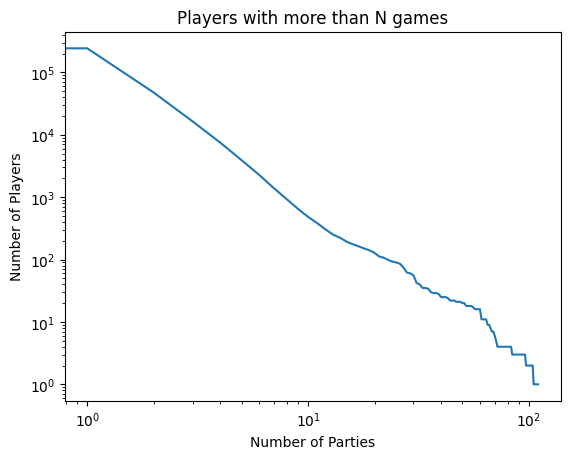

In [7]:
import matplotlib.pyplot as plt
players = data["Player ID"].value_counts()
nbPartiesPlayers = [None] * max(players.values)
for i in range(max(players.values)):
    nbPartiesPlayers[i] = players.drop(players[players.values<i].index).__len__()

plt.plot(nbPartiesPlayers)
plt.title("Players with more than N games")
plt.ylabel("Number of Players")
plt.xlabel("Number of Parties")
plt.yscale("log")
plt.xscale("log")
plt.show()

In [16]:
csv = pd.DataFrame(players.drop(players[players.values<2].index).index).to_csv("PlayersToParse.csv")